In [1]:
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np

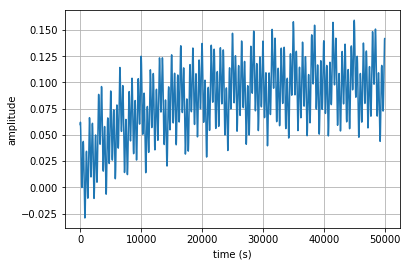

In [7]:
#Input Signal Characteristic

# Sample rate and desired cutoff frequencies (in Hz).
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

# Filter a noisy signal.
T = 0.05
num_samples = 50000
t = np.linspace(0, T, num_samples, endpoint=False)

a = 0.02
f0 = 600.0
Tx = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
Tx += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
Tx += a * np.cos(2 * np.pi * f0 * t + .11)
Tx += 0.03 * np.cos(2 * np.pi * 2000 * t)

plt.plot(Tx)#,"--",x,q,x,u)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid(True)
plt.show()
plt.close()

50000 piece of data.


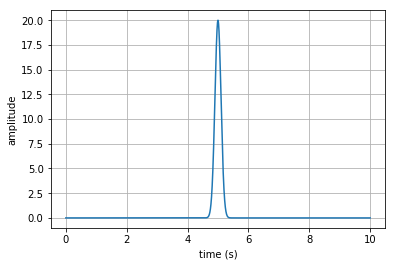

Proceeds to Channel with the following signal:  [ 0.  0.  0. ...,  0.  0.  0.]


In [2]:
#input function
selector = int(input("Enter type of waves: Gaussian (0), Sine(1), Cosine(2), Square(3) (running for 10 seconds): "))
samplefreq = 5000.0 #Hz
t = 10
num_samples = int(t*samplefreq)
x = np.linspace(0,t,num_samples,endpoint = False)
correct = True
while(correct == True):
	if selector == 0:
		#fc,bw = map(float,input("input parameters for the gaussian curve (center frequency, fractional bandwith): ").split())
		#u,q,gaussian = scipy.signal.gausspulse(x,fc,bw,bwr=-1,retquad = True,retenv = True)
		a,b,c = map(float,input("input parameters for the gaussian curve (scalar, mean, variacne):").split())
		gaussian = a*np.exp(-((x-b)**2)/2*c**2)
		Tx = gaussian
	elif selector==1:
		a,b,c = map(float,input("input parameters for the sine curve(amplitude, frequency(Hz), phase): ").split())
		sine = a*np.sin(x*b-c)
		Tx = sine
	elif selector==2:
		a,b,c = map(float,input("input parameters for the cosine curve (amplitude, frequency(Hz), phase): ").split()) 
		cosine = a*np.cos(x*b-c)
		Tx = cosine
	elif selector==3:
		t = float(input("Time taken for square wave(s): "))
		x = np.linspace(0,t,1000000)
		square = signal.square(2*np.pi*x)
		Tx = square
	else:
		Tx = directDelta

	print (len(Tx), "piece of data.")

	plt.plot(x,Tx)#,"--",x,q,x,u)
	plt.xlabel('time (s)')
	plt.ylabel('amplitude')
	plt.grid(True)
	plt.show()
	plt.close()
	check = input("is this the intended input wave? (Yes/No) ")

	if(check == "yes" or check == "Yes"):
		correct = False
	else:
		print("Please re-input the waves parameters.")
		correct = True

print("Proceeds to Channel with the following signal: ", Tx)


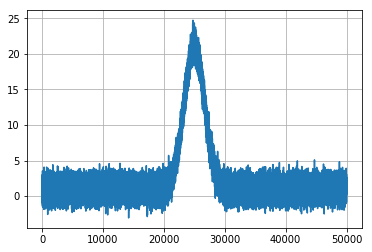

In [3]:
##### noise added


real_input_signal = Tx #+ white_noise

plt.grid(True)
plt.plot(real_input_signal)
plt.show()

79585  piece of data


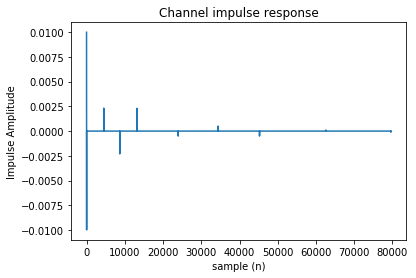

In [3]:
#########channel characteristics
h,r,d1,d2 = map(int,input("Channel Characteristics: Height, Range, d1 and d2 (meters): ").split())
f = int(input("Frequency of Transmitter (kHz): "))
eigen = int(input("Number of eigenpath: "))

#concerned variables
distance, lss, la, lb, angle = [0,0,0,0,0]

def findDistance(h,r,d1,d2,s,b):
	global distance
	if s>b or s==b :
		distance = np.sqrt(r**2+((2*b*h)+d1-((-1)**(s-b))*d2)**2)
	if b>s :
		distance = np.sqrt(r**2+((2*b*h)+d1-((-1)**(s-b))*d2)**2)
	return distance

def findlss(r):
	global lss
	lss =  1.0/r
	return lss

def findAngle(h,r,d1,d2,s,b):
	global angle
	if s>b or s==b:
		angle = 180*np.arctan2(r,((2*b*h)+d1-((-1)**(s-b))*d2))/np.pi
	if b>s:
		angle = 180*np.arctan2(r,((2*b*h)-d1+((-1)**(s-b))*d2))/np.pi
	if s==0 and b==0:
		angle = 0
	return angle

m = (1500.0/1023)
n = (1539.0/1650)

def findlb (angle, m, n,s,b):
	global lb
	lb = np.absolute((m*np.cos(np.pi*angle/180.0)-np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j))/(m*np.cos(np.pi*angle/180.0)+np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j)))
	return lb

salinity =  35 #value search on internet based on salinity in singapore
oceanT =  273+26 #26 celsius for shallow water about 70m deep.
ft = 21.9*10**(6-1520/oceanT)

def findla (salinity, ft, f, distance):
	global la
	la = np.exp(-0.998*distance*(((salinity*(2.34*10**-6)*ft*f)/(ft**2+f**2))+(((3.38*10**-6)*f**2)/(ft))))
	return la
d = 0
tao = 0
def findSamples(distance1, distance2):
	global tao, d
	tao = (distance1 - distance2)/1500 #speed of sound underwater m/s
	d += round(tao*num_samples,0) #time x sampling frequency = number of samples !!!! DOES NOT MAKE SENSE?
	samples.append(int(d))
	return tao, d

def findBj(Tx,s,b,e):
	findDistance(h,r,d1,d2,s,b)
	findAngle(h,r,d1,d2,s,b)
	#print ("value of s: ", s, "and value of b:", b)
	#print ("Distance for the ", e, "eigen path is: ", round(distance,4))
	findla(salinity, ft, f, distance)
	Bj = lss*la*(findlb(angle,m,n,s,b)**b)*(directDelta)
	if s%2!=0:
		Bj = -Bj
	#print("value of Bj: ", Bj)
	Bja.append(Bj)

	return Bja, distance

findlss(r)
distanceD = findDistance(h,r,d1,d2,0,0)
#print ("lss is: ", round(lss,3))

########Direct Delta function
directDelta = 1

#########iterating function (non-recursive)
Bja = []
samples = []
s,b,e = [0,0,0]
	
for j in range (int(eigen/3)+1):
	for i in range (3):
		if eigen == e:
			break
		e += 1
		findBj(Tx,s,b,e)
		findSamples(distance, distanceD)
		#print ("value of tao: ", tao)
		#print ("number of samples: ", samples)

#to change the s and b values
		if i == 0 or i == 2:
			s+= 1
		elif i == 1:
			s-= 1
			b+= 1

Hn = np.zeros(int(d)+10)
j = 0
k = 0

while j <= int(d):
    if j == samples[k]:
        Hn[j] = Bja[k]
        #print("value of samples[k]: ", samples[k])
        #print("value of Hn[j]: ", Hn[j])
        k += 1
    j += 1

x_axis = np.zeros(int(d))

########plotting the impulse Response
#print ("Impulse Response:", Bja)
print(len(Hn)," piece of data")
plt.title('Channel impulse response')
plt.xlabel("sample (n)")
plt.ylabel("Impulse Amplitude")
plt.plot(Hn)
plt.show()

Final signal:  [ 0.01290128 -0.06960305 -0.03422522 ...,  0.06065671 -0.15428327
  0.09988538]


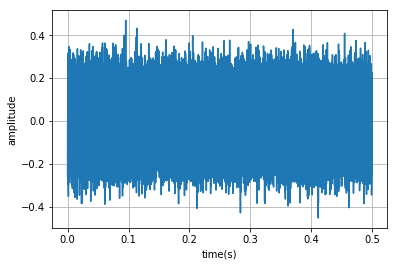

In [14]:
#convolution code
s1 = Tx #real_input_signal
s2 = Hn
#print ('s1: ', s1)
#print ('s2: ', s2)
#s3 = np.flip(s2,0)
#length = len(s1)+len(s2)-1

#s1_zeros = length - len(s1)
#s3_zeros = length - len(s3)

#temp_s1 = np.concatenate((np.zeros(s1_zeros),s1))
#temp_s2 = np.concatenate((s3, np.zeros(s3_zeros)))
#print('temp_s1 (pure input): ', temp_s1)
#print('temp_s2 (pure input): ', temp_s2)

#mul = 0
#out = np.zeros(length)

#for i in range(length):
#	if(i==0):
#		mul = temp_s1*temp_s2
#		#print('temp_s2 (when i==0): ', temp_s2)
#		#print('temp_s1 (when i==0): ', temp_s1)
#		out[i] = sum(mul)
#	else:
#		temp_s1 = np.concatenate((temp_s1[1:],temp_s1[:1]))#left shift, not sure how to do right shift
#		#print('temp_s2: ', temp_s2)
#		#print('temp_s1: ', temp_s1)
#		mul = temp_s1*temp_s2
#		out[i] = sum(mul)
out = []
out = np.convolve(s1,s2,mode = "full")
#### noise added
mean = 0
std = 0.1
white_noise = np.random.normal(mean, std, size=len(out))

out += white_noise

#########plotting the model
print ("Final signal: ", out)
x_axis = np.linspace(0,0.5,len(out))
plt.grid(True)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.plot(x_axis, out)
plt.show()


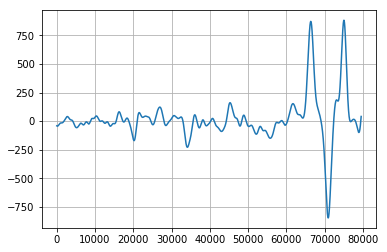

In [15]:
#Correlating Impulse Response and Received Signal to identify input signal
checkingInputSignal = np.correlate(Tx,out)
plt.grid(True)
plt.plot(checkingInputSignal)
plt.show()

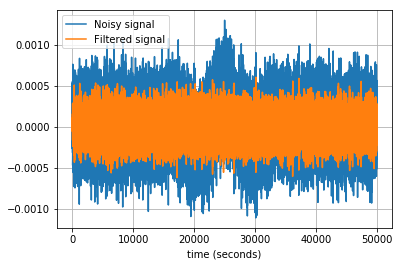

In [9]:
from scipy.signal import butter, lfilter
from scipy.signal import freqz


def butter_bandpass(lowcut, highcut, samplefreq, order=5):
    nyq = 0.5 * samplefreq
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, samplefreq, order=5):
    b, a = butter_bandpass(lowcut, highcut, samplefreq, order=order)
    y = lfilter(b, a, data)
    return y

lowcut = 500.0
highcut = 1250.0


x = checkingInputSignal
plt.figure(2)
plt.clf()
plt.plot(x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, samplefreq, order=4)
plt.plot(y, label='Filtered signal') #(%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

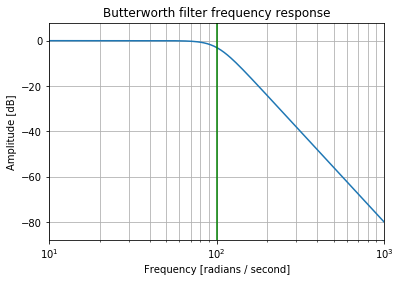

In [34]:

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0plt.show()

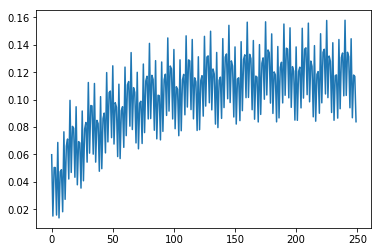

In [67]:
a = 0.02
f0 = 1.0
x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)


plt.plot(x, label='Noisy signal')
plt.show()


In [103]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Filter a noisy signal.
    T = 0.05
    nsamples = 50000
    t = np.linspace(0, T, nsamples, endpoint=False)
    #a = 2
    #f0 = 600.0
    #x = a * np.cos(2 * np.pi * f0 * t + .11)
    #mean = 1
    #std = 0.5
    #white_noise = np.random.normal(mean, std, size=250)
    #x += white_noise
    Tx += 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    Tx += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    Tx += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, Tx, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=10)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

ValueError: x and y must have same first dimension, but have shapes (50000,) and (250,)

100 2000


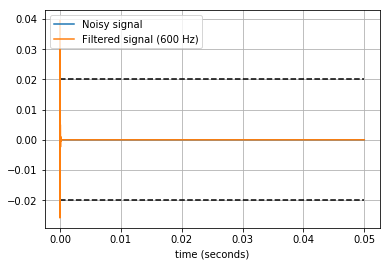

In [15]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    x = checkingInputSignal
    lowcut = 100
    highcut = 2000
    # Filter a noisy signal.
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(Tx, lowcut, highcut, fs, order=6)
    print (lowcut, highcut)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()